# 1) To set up your own data cleaning pipeline

In [1]:
#Load the datasets
def read_dataset(name): #when only one dataset is provided as input
    import pandas as pd
    if name == "gpsa":
        df = pd.read_csv('../datasets/googleplaystore.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "gpsu":
        df = pd.read_csv('../datasets/googleplaystore_reviews.csv', sep=',',encoding = 'ISO-8859-1')  
    elif name == "titanic":
        df = pd.read_csv('../datasets/titanic/titanic_train.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "house":
        df = pd.read_csv('../datasets/house/house_train.csv', sep=',', encoding ='ISO-8859-1')
    else: 
        raise ValueError('Invalid dataset name')               
    return df


In [2]:
read_dataset("house").head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## - Loading your data

In [3]:
import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import pandas as pd

# executing profiling function for one dataset as input
rd.profile_summary(read_dataset('house'), plot=False)


Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id    int64                  0.0              1460.0                   0       -1.2
1      MSSubClass    int64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea    int64                  0.0              1073.0             12.1951    202.544
4     OverallQual    int64                  0.0                10.0            0.216721  0.0918565
5     OverallCond    int64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt    int64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd    int64                  0.0                61.0           -0.503044     -1.272
8      MasVnrArea  float64                  8.0               328.0  2.6663261001607443   

In [4]:

read_dataset('house')['SalePrice'].head() # the target variable is numerical 


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [5]:

# no encoding of the target variable
d_not_enc = rd.Reader(sep=',',verbose=True, encoding=False) 

# when you have two datasets as inputs: train and test datasets
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
house_not_encoded['train'].head()
house_not_encoded['test'].head()


Reading csv : house_train.csv ...
Reading data ...
CPU time: 4.916549921035767 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8 

CPU time: 0.24585962295532227 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64        

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,NaN,3.0,1Fam,TA,No,706.0,0.0,...,Normal,0.0,Pave,8.0,856.0,AllPub,0.0,2003.0,2003.0,2008.0
1,1262.0,0.0,0.0,NaN,3.0,1Fam,TA,Gd,978.0,0.0,...,Normal,0.0,Pave,6.0,1262.0,AllPub,298.0,1976.0,1976.0,2007.0
2,920.0,866.0,0.0,NaN,3.0,1Fam,TA,Mn,486.0,0.0,...,Normal,0.0,Pave,6.0,920.0,AllPub,0.0,2001.0,2002.0,2008.0
3,961.0,756.0,0.0,NaN,3.0,1Fam,Gd,No,216.0,0.0,...,Abnorml,0.0,Pave,7.0,756.0,AllPub,0.0,1915.0,1970.0,2006.0
4,1145.0,1053.0,0.0,NaN,4.0,1Fam,TA,Av,655.0,0.0,...,Normal,0.0,Pave,9.0,1145.0,AllPub,192.0,2000.0,2000.0,2008.0


In [6]:

# otherwise for only one dataset as input, 
# train_test_split function will split the input dataset into train/test dataset
house_train_only  = ["../datasets/house/house_train.csv"]
house_train_only_not_encoded = d_not_enc.train_test_split(house_train_only, 'SalePrice')
house_train_only_not_encoded['train'].head() 


Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.40698695182800293 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1058,1059.0,60.0,RL,96.0,11308.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,7.0,2009.0,WD,Normal,335000.0
155,156.0,50.0,RL,60.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4.0,2008.0,WD,Normal,79000.0
149,150.0,50.0,RM,NaN,6240.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4.0,2006.0,WD,Normal,115000.0
303,304.0,20.0,RL,70.0,9800.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,GdWo,NaN,0.0,7.0,2006.0,WD,Abnorml,149900.0
933,934.0,20.0,RL,63.0,8487.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2009.0,WD,Normal,190000.0


## - Normalize your data

In [7]:
# >> Examples of normalization
# The choice for the normalizer : 'ZS', 'MM','DS' or 'Log10'
#    Available strategies=
#       - 'ZS' z-score normalization
#       - 'MM' MinMax scaling
#       - 'DS' decimal scaling
#       - 'Log10 log10 scaling

import learn2clean.normalization.normalizer as nl 

# MM normalization with exclude = None, all numeric variables will be normalized
n1= nl.Normalizer(house_not_encoded.copy(),strategy='MM',exclude=None, verbose =False)
print('"LotArea" original variable\n',house_not_encoded['train']['LotArea'].head())
print('"LotArea" normalized variable\n', n1.transform()['train']['LotArea'].head())

#n1.transform()['train']
n1.transform()['target'].head()

"LotArea" original variable
 0     8450.0
1     9600.0
2    11250.0
3     9550.0
4    14260.0
Name: LotArea, dtype: float64
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.04754805564880371 seconds

"LotArea" normalized variable
 0    0.033420
1    0.038795
2    0.046507
3    0.038561
4    0.060576
Name: LotArea, dtype: float64
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03085803985595703 seconds



0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [8]:

#ZS normalization
n3= nl.Normalizer(house_not_encoded.copy(),strategy='ZS',exclude=None, verbose = False)
print('ZS normalized variables\n',n3.transform()['train'].head())

#DS scaling
n4= nl.Normalizer(house_not_encoded.copy(),strategy='DS',exclude=None, verbose = False)
print('DS normalized variables\n',n4.transform()['train'].head())

#Log10 scaling
n5= nl.Normalizer(house_not_encoded.copy(),strategy='Log10',exclude=None, verbose = False)
#print('Log10 normalized variables\n',n5.transform()['train'].head())
print('Log10 normalized variables none excluded in train dataset\n',n5.transform()['train']['LotArea'].head())
print('Log10 normalized variables none excluded in test dataset\n',n5.transform()['test']['LotArea'].head())

#Log10 scaling  excluding target variable 'SalePrice'
n6= nl.Normalizer(house_not_encoded.copy(),strategy='Log10',exclude='LotArea',verbose = False)

print('Log10 normalized variables LotArea excluded in train dataset \n',n6.transform()['train']['LotArea'].head())
print('Log10 normalized variables LotArea excluded  in test dataset \n',n6.transform()['test']['LotArea'].head())

n7= nl.Normalizer(house_not_encoded.copy(),strategy='Log10',exclude='Fare', verbose = False)
print('Log10 normalized variables none excluded\n', n5.transform()['train']['YearBuilt'].head())
print("Log10 normalized variables 'YearBuilt' excluded\n")
n7.transform()['train']['YearBuilt'].head()
# here YearBuilt is not excluded from normalization!



>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.07704591751098633 seconds

ZS normalized variables
    1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.793162  1.161454  -0.116299      0.163723    0.575228   -0.288554   
1  0.257052 -0.794891  -0.116299      0.163723    1.171591   -0.288554   
2 -0.627611  1.188943  -0.116299      0.163723    0.092875   -0.288554   
3 -0.521555  0.936955  -0.116299      0.163723   -0.499103   -0.288554   
4 -0.045596  1.617323  -0.116299      1.389547    0.463410   -0.288554   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  MasVnrType  \
0      1.107431     -0.240978  -0.944267      -0.359202  ...     BrkFace   
1     -0.819684      3.947457  -0.641008      -0.359202  ...        None   
2      1.107431     -0.240978  -0.301540      -0.359202  ...     BrkFace   
3      1.107431     -0.240978  -0.061648       4.091122  ...        None  

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: YearBuilt, dtype: float64

In [9]:
# To prevent that and avoid normalization for more than one numeric or year/month/date variables, 
# please change the data type into 'object' data type right after loading 
# and before normalization and learn2clean pipeline

house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')

# not exhaustively
house_not_encoded['train']['YrSold'] = house_not_encoded['train']['YrSold'].astype('object')
house_not_encoded['train']['YearBuilt'] = house_not_encoded['train']['YearBuilt'].astype('object')
house_not_encoded['train']['MoSold'] = house_not_encoded['train']['MoSold'].astype('object')
house_not_encoded['train']['MiscVal'] = house_not_encoded['train']['MiscVal'].astype('object')
house_not_encoded['train']['GarageYrBlt'] = house_not_encoded['train']['GarageYrBlt'].astype('object')
house_not_encoded['train']['YearRemodAdd'] = house_not_encoded['train']['YearRemodAdd'].astype('object')

normalized_house = nl.Normalizer(house_not_encoded.copy(),strategy='DS',exclude='SalePrice', verbose = False).transform()
normalized_house['train'].head()




Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.37602806091308594 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272


Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64                 15.0               304.0     

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,Street,Utilities,YearBuilt,YearRemodAdd,YrSold
0,0.213333,0.845819,0.0,0.555556,0.755265,0.0,0.777778,0.000000,0.169169,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,2003,2003,2008
1,0.666667,0.000000,0.0,0.555556,0.873755,0.0,0.000000,0.944444,0.297852,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,1976,1976,2007
2,0.305185,0.854066,0.0,0.555556,0.598183,0.0,0.777778,0.000000,0.438795,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,2001,2002,2008
3,0.357536,0.778465,0.0,0.555556,0.426237,0.0,0.777778,0.000000,0.520202,0.930244,...,Y,NaN,CompShg,Gable,Abnorml,Pave,AllPub,1915,1970,2006
4,0.565104,0.902080,0.0,0.888889,0.718228,0.0,0.777778,0.000000,0.482323,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,2000,2000,2008


## - Replace missing values

In [10]:
#>> Examples for missing value imputation
# Available strategies:
#            - 'EM': only for numerical variables; imputation based on
#                expectation maximization
#            - 'MICE': only for numerical variables  missing at random (MAR);
#                Multivariate Imputation by Chained Equations
#            - 'KNN', only for numerical variables; k-nearest neighbor
#                imputation (k=4) which weights samples using the mean squared
#                difference on features for which two rows both have observed
#                data
#            - 'RAND', 'MF': both for numerical and categorical variables;
#                replace missing values by randomly selected value in the 
#                variable domain or by the most frequent value in the variable
#                domain respectively
#            - 'MEAN', 'MEDIAN': only for numerical variables; replace missing
#                values by mean or median of the numerical variable respectvely
#            - or 'DROP' remove the row with at least one missing value

import learn2clean.imputation.imputer as imp

# replace missing values by the most frequent ones in the training and testing datasets

print('Number of missing values',normalized_house['train'].isnull().sum().sum()) 
imp1 = imp.Imputer(normalized_house.copy(),strategy='MF', verbose=True).transform()
imp2 = imp.Imputer(normalized_house.copy(),strategy='RAND', verbose=True).transform()
imp3 = imp.Imputer(normalized_house.copy(),strategy='DROP', verbose=True).transform()
imp4 = imp.Imputer(normalized_house.copy(),strategy='MEAN', verbose=True).transform() 
imp5 = imp.Imputer(normalized_house.copy(),strategy='KNN', verbose=True).transform()
imp6 = imp.Imputer(normalized_house.copy(),strategy='MEDIAN', verbose=True).transform()
imp6 = imp.Imputer(normalized_house.copy(),strategy='EM', verbose=True).transform()
imp6 = imp.Imputer(normalized_house.copy(),strategy='MICE', verbose=True).transform()


Number of missing values 6965
>>Imputation 
* For train dataset
Before imputation:
Total 6965 missing values in ['LotFrontage', 'MasVnrArea', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
- 267 numerical missing values in ['LotFrontage', 'MasVnrArea']
- 6698 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
Most frequent value for  1stFlrSF is: 0.2222222222222222
Most frequent value for  2ndFlrSF is: 0.0
Most frequent value for  3SsnPorch is: 0.0
Most frequent value for  BedroomAbvGr is: 0.5555555555555555
Most frequent value for  BsmtFinSF1 is: 0.0
Most frequent value for  BsmtFinSF2 is: 0.0
M

- 0 non-numerical missing values
Imputation done -- CPU time: 0.29784297943115234 seconds

>>Imputation 
* For train dataset
Before imputation:
Total 6965 missing values in ['LotFrontage', 'MasVnrArea', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
- 267 numerical missing values in ['LotFrontage', 'MasVnrArea']
- 6698 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
* For test dataset
Before imputation:
Total 13964 missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath',

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any valu

After imputation:
Total 6698 missing values
- 0 numerical missing values
- 6698 non-numerical missing values
* For test dataset
Before imputation:
Total 13964 missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'KitchenQual', 'MSZoning', 'MasVnrType', 'MiscFeature', 'PoolQC', 'Utilities']
- 678 numerical missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']
- 13286 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', '

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


After imputation:
Total 13286 missing values
- 0 numerical missing values
- 13286 non-numerical missing values
Imputation done -- CPU time: 59.69806218147278 seconds

>>Imputation 
* For train dataset
Before imputation:
Total 6965 missing values in ['LotFrontage', 'MasVnrArea', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
- 267 numerical missing values in ['LotFrontage', 'MasVnrArea']
- 6698 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
After imputation:
Total 6698 missing values
- 0 numerical missing values
- 6698 non-numerical missing values
* For test dataset
Before imputation:
Total 13

## - Detect outliers and remove them

In [11]:
# >> Examples for outlier detection and removal
# Available strategies =
#            'ZS': detects outliers using the robust Zscore as a function
#            of median and median absolute deviation (MAD)
#            'IQR': detects outliers using Q1 and Q3 +/- 1.5*InterQuartile Range
#            'LOF': detects outliers using Local Outlier Factor

                
import learn2clean.outlier_detection.outlier_detector as out

#to remove rows having 30% and more ZSB-based outling values among the numerical variables
out1=out.Outlier_detector(house_not_encoded.copy(), strategy='ZSB', threshold = .3, verbose=True)
out1.transform()

#to remove rows having at least one IQR-based outlying value using threshold '-1'
out2=out.Outlier_detector(house_not_encoded.copy(), strategy='IQR', threshold = -1, verbose=False)
out2.transform()

#to remove rows having 40% and more ZSB-based outling values among the numerical variables; 
# since LOF requires non missing values, rows with NaN are also removed
out3=out.Outlier_detector(house_not_encoded.copy(), strategy='LOF', threshold = .4, verbose=False)
out3.transform()



>>Outlier detection and removal:
* For train dataset
90 outlying rows have been removed:
with indexes: [4, 20, 53, 58, 65, 75, 112, 114, 118, 125, 159, 165, 167, 178, 185, 197, 198, 231, 251, 278, 304, 320, 321, 330, 344, 349, 363, 378, 389, 417, 434, 440, 477, 480, 496, 515, 520, 523, 527, 529, 533, 583, 591, 614, 635, 642, 649, 654, 661, 664, 691, 718, 745, 747, 759, 769, 798, 803, 825, 854, 888, 898, 918, 1007, 1024, 1031, 1032, 1044, 1046, 1067, 1068, 1142, 1169, 1173, 1182, 1184, 1228, 1230, 1243, 1266, 1268, 1284, 1298, 1313, 1350, 1353, 1373, 1386, 1405, 1449]

Outliers:
      1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
4       1145.0    1053.0        0.0   NaN           4.0     1Fam       TA   
20      1158.0    1218.0        0.0   NaN           4.0     1Fam       TA   
53      1842.0       0.0        0.0   NaN           0.0     1Fam       TA   
58      1426.0    1519.0        0.0   NaN           3.0     1Fam       TA   
65      1143.0    1330.0     

{'train': Empty DataFrame
 Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, Alley, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2, Electrical, EnclosedPorch, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Fireplaces, Foundation, FullBath, Functional, GarageArea, GarageCars, GarageCond, GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea, HalfBath, Heating, HeatingQC, HouseStyle, Id, KitchenAbvGr, KitchenQual, LandContour, LandSlope, LotArea, LotConfig, LotFrontage, LotShape, LowQualFinSF, MSSubClass, MSZoning, MasVnrArea, MasVnrType, MiscFeature, MiscVal, MoSold, Neighborhood, OpenPorchSF, OverallCond, OverallQual, PavedDrive, PoolArea, PoolQC, RoofMatl, RoofStyle, SaleCondition, ScreenPorch, Street, TotRmsAbvGrd, TotalBsmtSF, Utilities, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold]
 Index: []
 
 [0 rows x 79 columns],
 'test': Em

## - Detect duplicates and remove them

In [12]:
# >> Examples for duplicate detection and removal
# House dataset has no duplicate anyway
# Available strategies =
#        'ED':  exact duplicate detection/removal or
#        'AD':  for aproximate duplicate records detection and removal
#        based on Jaccard similarity 


# import the Duplicate_detector class
import learn2clean.duplicate_detection.duplicate_detector as dup

#Remove exact duplicates with 'ED' strategy of the Duplicate_detector class

dup.Duplicate_detector(house_not_encoded.copy(), strategy='ED', verbose=False).transform()

#Remove approximate duplicates with thresholding Jaccard similarity 
# using 'AD'strategy of the Duplicate_detector class
dup.Duplicate_detector(house_not_encoded.copy(), strategy='AD', threshold = .5, verbose=False).transform()



>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 1460
After deduplication: Number of rows: 1460
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.0447080135345459 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 0.5926268100738525 seconds



{'train':       1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
 0        856.0     854.0        0.0   NaN           3.0     1Fam       TA   
 1       1262.0       0.0        0.0   NaN           3.0     1Fam       TA   
 2        920.0     866.0        0.0   NaN           3.0     1Fam       TA   
 3        961.0     756.0        0.0   NaN           3.0     1Fam       Gd   
 4       1145.0    1053.0        0.0   NaN           4.0     1Fam       TA   
 ...        ...       ...        ...   ...           ...      ...      ...   
 1455     953.0     694.0        0.0   NaN           3.0     1Fam       TA   
 1456    2073.0       0.0        0.0   NaN           3.0     1Fam       TA   
 1457    1188.0    1152.0        0.0   NaN           4.0     1Fam       Gd   
 1458    1078.0       0.0        0.0   NaN           2.0     1Fam       TA   
 1459    1256.0       0.0        0.0   NaN           3.0     1Fam       TA   
 
      BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleC

## - Detect inconsistencies

In [13]:
# >> Examples for inconsistency detection 
# Available consistency checking strategies :
#            - 'CC': checks whether the data satisfy the constraints
#                specified in a 'file_name'_constraint.tdda stored in 'save' directory
#            - 'PC': checks whether the data satisfy the patterns
#                specified in 'file_name'_patterns.txt stored in 'save' directory

# import the Consistency_checker class                
import learn2clean.consistency_checking.consistency_checker as cc
import learn2clean.loading.reader as rd 
d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
            
# discover the constraints from the input (train) dataset and store them in a file entitled 'house_discovered'_constraint.tdda in the 'save' directory
#cc.constraint_discovery(read_dataset('house'), file_name='house_discovered')

# discover the patterns from the input (train) dataset and store them in a file entitled 'house_discovered'_patterns.txt in the 'save' directory
#cc.pattern_discovery(read_dataset('house'), file_name='house_discovered')

# detect pattern violations with respect to a given file of patterns entitled 'house_example'_constraint.tdda" stored in the 'save' directory
#cc.Consistency_checker(house_not_encoded, strategy='CC', file_name='house_example',verbose=True).transform()

# detect pattern violations with respect to a given file of patterns entitled 'house_example1'_patterns.txt" stored in the 'save' directory
# with too strong patterns resulting in an empty dataframe fro the training set
cc.Consistency_checker(house_not_encoded, strategy='PC', file_name='house_example1', verbose=False).transform()

# detect pattern violations with respect to a given file of patterns entitled 'house_example2'_patterns.txt" stored in the 'save' directory
cc.Consistency_checker(house_not_encoded, strategy='PC', file_name='house_example2', verbose=False).transform()


>>Consistency checking
* For train dataset
Number of pattern violations on variable ' MSZoning 'for pattern# 0 : 1242
Number of pattern violations on variable ' MSZoning 'for pattern# 1 : 309
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 230
No record from the dataset satisfied the patterns!
Will return empty dataset - please change our patterns
* For test dataset
Number of pattern violations on variable ' MSZoning 'for pattern# 0 : 2459
Number of pattern violations on variable ' MSZoning 'for pattern# 1 : 654
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 447
Consistency checking done -- CPU time: 0.046797752380371094 seconds
>>Consistency checking
* For train dataset
No violation on variable ' SaleCondition ' for pattern# 0 as '^[A-Za-z]{5,6}$'
No record from the dataset satisfied the patterns!
Will return empty dataset - please change our patterns
* For test dataset
No violation on variable ' SaleCondition ' for pattern# 0 as 

{'train': Empty DataFrame
 Columns: [Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, Street, Utilities]
 Index: []
 
 [0 rows x 42 columns],
 'test':      Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
 2904   NaN     1Fam      NaN          NaN          NaN          NaN      NaN   
 2250   NaN     1Fam       TA           No          Unf          Unf       TA   
 1915   NaN     1Fam      NaN          NaN          NaN          NaN      NaN   
 
      CentralAir Condition1 Condition2  ... MasVnrType MiscFeature  \
 2904          Y     Artery       Norm 

## - Select features

In [14]:
# >> Examples for Feature selection
# Available strategies=
#           'MR': using a default threshold on the missing ratio per variable,
#            i.e., variables with 20% (by default) and more missing values
#            are removed
#            'LC': detects pairs of linearly correlated variables and remove one
#            'VAR': uses threshold on the variance
#            'Tree': uses decision tree classification as model for feature
#                selection given the target set for classification task
#                'SVC': uses linear SVC as model for feature selection given
#                 the target set for classification task
#            'WR': uses the selectKbest (k=10) and Chi2 for feature selection
#                given the target set for classification task
#            'L1': uses Lasso L1 for feature selection given the target set for
#                regression task
#            'IMP': uses Random Forest regression for feature selection given
#                the target set for regression task

                
import learn2clean.feature_selection.feature_selector as fs
import learn2clean.loading.reader as rd 
d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
  
#Available strategies for feature selection 
#        'MR': using a default threshold on the missing ratio per variable, i.e., variables
#                with 20% (by default) and more missing values are removed
#        'LC': detects pairs of linearly correlated variables and remove one
#        'VAR': uses threshold on the variance
#        'Tree': uses decision tree classification as model for feature selection given the target set for classification task
#        'SVC': uses linear SVC as model for feature selection given the target set for classification task
#        'WR': uses the selectKbest (k=10) and Chi2 for feature selection given the target set for classification task
#        'L1': uses Lasso L1 for feature selection given the target set for regression task
#        'IMP': uses Random Forest regression for feature selection given the target set for regression task

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'MR', threshold=0.1, exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'LC', threshold=0.2,  exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'L1',  exclude= None, threshold=.3,verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'IMP', exclude = 'SibSp',verbose=True, threshold=.4).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'Tree',  exclude='Pclass',verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'WR', exclude= None, verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'WR', exclude= 'Sex', verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'SVC',  exclude=None).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'VAR',  exclude=None).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'VAR',  exclude='Cabin').transform()



>>Feature selection 
Before feature selection:
79 features 
Apply MR feature selection with missing threshold= 0.1
              missing_fraction
PoolQC                0.995205
MiscFeature           0.963014
Alley                 0.937671
Fence                 0.807534
FireplaceQu           0.472603
...                        ...
HeatingQC             0.000000
HouseStyle            0.000000
Id                    0.000000
KitchenAbvGr          0.000000
YrSold                0.000000

[79 rows x 1 columns]
6 features with greater than 0.10 missing values.

List of variables to be removed : ['Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'MiscFeature', 'PoolQC']
List of variables to be keep
['Heating', 'MasVnrArea', 'LandSlope', 'BsmtFinType1', 'BsmtUnfSF', 'OpenPorchSF', 'BsmtFinSF1', 'OverallCond', 'EnclosedPorch', 'GarageArea', 'GarageType', 'LowQualFinSF', 'GarageYrBlt', '1stFlrSF', 'BsmtExposure', 'GarageCond', 'GarageQual', 'RoofMatl', 'PoolArea', 'ExterCond', '3SsnPorch', 'LotCon

25 features with linear correlation greater than 0.20.

List of correlated variables to be removed : ['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']
List of numerical variables to be keep
['EnclosedPorch', 'Id', 'KitchenAbvGr', 'MoSold', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', '1stFlrSF', '3SsnPorch', 'ScreenPorch', 'BsmtFinSF2']
After feature selection:
54 features remain
['Heating', 'Fence', 'LandSlope', 'BsmtFinType1', 'MSZoning', 'SaleCondition', 'LotShape', 'BsmtFinSF2', 'Utilities', 'EnclosedPorch', 'Id', 'GarageFinish', 'Electrical', 'CentralAir', 'MasVnrType', 'GarageType', 'BsmtHalfBath', 'LowQualFinSF', 'Alley', '1stFlrSF', 'BsmtFinType2', 'BsmtExposure', 'Condition

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 541666712400.78125, tolerance: 77155236429.02914
  positive)


Exclude variable invalid. Please choose a variablefrom the input training dataset.
After feature selection:
22 features remain
['MasVnrArea', 'GarageCars', 'BsmtUnfSF', 'OpenPorchSF', 'YearRemodAdd', 'BsmtFinSF1', 'OverallCond', 'Id', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF', 'LotArea', 'LotFrontage', 'FullBath', 'MoSold', 'WoodDeckSF', 'OverallQual', 'TotRmsAbvGrd', '2ndFlrSF', 'YearBuilt', 'GrLivArea']
Feature selection done -- CPU time: 0.2642028331756592 seconds


>>Feature selection 
Before feature selection:
79 features 
Apply Tree-based feature selection 
Best features to keep ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'Id', 'LotArea', 'LotFrontage', 'MasVnrArea', 'MoSold', 'OpenPorchSF', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']
Exclude variable invalid. Please choose a variablefrom the input training dataset.
After feature selection:
20 features remain
['Id

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'train':       1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
 0          856       854          0   NaN             3     1Fam       TA   
 1         1262         0          0   NaN             3     1Fam       TA   
 2          920       866          0   NaN             3     1Fam       TA   
 3          961       756          0   NaN             3     1Fam       Gd   
 4         1145      1053          0   NaN             4     1Fam       TA   
 ...        ...       ...        ...   ...           ...      ...      ...   
 1455       953       694          0   NaN             3     1Fam       TA   
 1456      2073         0          0   NaN             3     1Fam       TA   
 1457      1188      1152          0   NaN             4     1Fam       Gd   
 1458      1078         0          0   NaN             2     1Fam       TA   
 1459      1256         0          0   NaN             3     1Fam       TA   
 
      BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleC

## >> Classification 

In [15]:
import learn2clean.classification.classifier as cl
#output is accuracy of classification for k=10 cross-validation and execution time 
#plus a detailed classification report if verbose = True
import learn2clean.loading.reader as rd 
d_enc = rd.Reader(sep=',',verbose=False, encoding=True) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_encoded = d_enc.train_test_split(house, 'SaleCondition')


Cl1 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'LDA', verbose = False).transform()
Cl2 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'MNB',verbose = False).transform()
Cl3 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'NB',verbose = False).transform()
Cl4 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'CART',verbose = True).transform()



>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8001744955767944

Classification done -- CPU time: 0.13002514839172363 seconds

>>Classification task


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy of Multinomial Naive Bayes classification for 10 cross-validation : 0.213

Classification done -- CPU time: 8.131878852844238 seconds

>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.09747963042376517

Classification done -- CPU time: 0.08529806137084961 seconds

>>Classification task


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'mean_fit_time': array([0.00803685, 0.01126761, 0.0142333 , 0.01698456, 0.01842401]), 'std_fit_time': array([0.00010421, 0.00010905, 0.00010882, 0.00023   , 0.00040199]), 'mean_score_time': array([0.00147166, 0.00149553, 0.00146959, 0.00150697, 0.00151069]), 'std_score_time': array([3.27389948e-05, 5.00933321e-05, 1.99544956e-05, 6.66689332e-05,
       6.58507670e-05]), 'param_max_depth': masked_array(data=[3, 5, 7, 9, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 3}, {'max_depth': 5}, {'max_depth': 7}, {'max_depth': 9}, {'max_depth': 10}], 'split0_test_score': array([0.86784141, 0.89867841, 0.88546256, 0.88986784, 0.86784141]), 'split1_test_score': array([0.84581498, 0.86784141, 0.86784141, 0.85022026, 0.85903084]), 'split2_test_score': array([0.85903084, 0.89867841, 0.88986784, 0.86784141, 0.87665198]), 'split3_test_score': array([0.83700441, 0.87665198, 0.88105727, 0.88105727, 0.88105727]), 'sp

## >> Regression

In [16]:
import learn2clean.regression.regressor as rg
# output is MSE and computation time, with regression summary if verbose = True

import learn2clean.loading.reader as rd 
d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
  
    
rg1 = rg.Regressor(dataset = house_not_encoded,target = 'SalePrice',strategy= 'LASSO', verbose = True).transform()

rg3 = rg.Regressor(dataset = house_not_encoded,target = 'SalePrice',strategy= 'OLS',verbose = True).transform()

rg2 = rg.Regressor(dataset = house_not_encoded,target = 'SalePrice',strategy= 'MARS',verbose = True).transform()



>>Regression task


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709269261782.3635, tolerance: 4200650385.3545003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 708082680388.4646, tolerance: 4200650385.3545003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706992049512.839, tolerance: 4200650385.3545003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_

MSE values of cross validation
[[8.23014880e+08 9.43324263e+08 7.85739907e+08 2.11508746e+09
  1.90954945e+09 1.23725599e+09 1.00010508e+09 1.17530792e+09
  4.78814172e+09 9.80573235e+08]
 [8.20323363e+08 9.40411065e+08 7.83080690e+08 2.11443141e+09
  1.90636612e+09 1.23488480e+09 9.98348335e+08 1.16859980e+09
  4.79071404e+09 9.78396852e+08]
 [8.17519024e+08 9.37751124e+08 7.80568693e+08 2.11448351e+09
  1.90299198e+09 1.23321462e+09 9.97060396e+08 1.16237424e+09
  4.79389124e+09 9.75593687e+08]
 [8.14892384e+08 9.35343382e+08 7.78257153e+08 2.11454302e+09
  1.89985067e+09 1.23168256e+09 9.95937646e+08 1.15652492e+09
  4.79720251e+09 9.72969444e+08]
 [8.12430596e+08 9.33162697e+08 7.76123935e+08 2.11459638e+09
  1.89692381e+09 1.23029063e+09 9.94974879e+08 1.15102240e+09
  4.80066142e+09 9.70476627e+08]
 [8.10120644e+08 9.31187363e+08 7.74152175e+08 2.11463494e+09
  1.89419490e+09 1.22903007e+09 9.94160916e+08 1.14584442e+09
  4.80425725e+09 9.68091644e+08]
 [8.07950282e+08 9.29398498

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752927460385.4459, tolerance: 4629197272.2337
  positive)


const           -335086.537396
1stFlrSF             14.471849
2ndFlrSF             15.123652
3SsnPorch            33.485218
BedroomAbvGr     -10218.910455
BsmtFinSF1            9.680342
BsmtFinSF2            0.666222
BsmtFullBath       9042.802184
BsmtHalfBath       2465.037044
BsmtUnfSF            -2.671021
EnclosedPorch         7.294943
Fireplaces         4371.869843
FullBath           5433.144623
GarageArea            6.274364
GarageCars        16849.717185
GarageYrBlt         -47.276296
GrLivArea            31.501703
HalfBath          -1098.339505
Id                   -1.205343
KitchenAbvGr     -22023.484046
LotArea               0.542218
LotFrontage        -116.028231
LowQualFinSF          1.906201
MSSubClass         -200.062292
MasVnrArea           31.407563
MiscVal              -3.761471
MoSold             -221.698010
OpenPorchSF          -2.252394
OverallCond        5239.486385
OverallQual       18656.249651
PoolArea            -60.517113
ScreenPorch          58.046544
TotRmsAb

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,1.0,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,1.0,920,866,0,3,486.0,0.0,1.0,0.0,434.0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,1.0,961,756,0,3,216.0,0.0,1.0,0.0,540.0,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,1.0,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,...,5,8,0,0,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,1.0,1360,0,0,3,119.0,344.0,1.0,0.0,641.0,...,5,5,0,0,8,1104.0,160,1969,1979,2006
2912,1.0,546,546,0,3,408.0,0.0,0.0,0.0,138.0,...,5,4,0,0,5,546.0,0,1970,1970,2006
2915,1.0,546,546,0,3,252.0,0.0,0.0,0.0,294.0,...,5,4,0,0,6,546.0,0,1970,1970,2006
2916,1.0,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,...,7,5,0,0,7,1224.0,474,1960,1996,2006


(38,)

(2267, 38)

(38,)

(2267, 38)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     131.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:13:02   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1085   BIC:                         2.697e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.351e+05    1.7e+

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an em

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

Earth Model
-------------------------------------------
Basis Function        Pruned  Coefficient  
-------------------------------------------
(Intercept)           No      -1.0404e+06  
OverallQual           No      14506.7      
h(GrLivArea-1470)     Yes     None         
h(1470-GrLivArea)     Yes     None         
h(TotalBsmtSF-2153)   No      -75.7838     
h(2153-TotalBsmtSF)   No      -10.3519     
h(BsmtFinSF1-740)     Yes     None         
h(740-BsmtFinSF1)     No      75.544       
h(YearRemodAdd-2009)  No      57958.2      
h(2009-YearRemodAdd)  No      -142.231     
h(1stFlrSF-2136)      No      -246.054     
h(2136-1stFlrSF)      Yes     None         
h(2ndFlrSF-1392)      Yes     None         
h(1392-2ndFlrSF)      No      1350.91      
h(LotArea-15426)      No      7.78832      
h(15426-LotArea)      No      -8.79728     
YearBuilt             No      590.711      
h(TotalBsmtSF-1541)   No      94.8993      
h(1541-TotalBsmtSF)   Yes     None         
h(GarageArea-364)   

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-

## >> Clustering

In [17]:
import learn2clean.clustering.clusterer as ct
# clustering is applied to one dataset (i.e., the training set if two datasets are given in the path)
# output is silhouette, best k, and computation time, plus the training dataset with cluster IDs

ct.Clusterer(dataset = house_not_encoded,strategy= 'KMEANS', verbose=True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', verbose = True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', metric= 'euclidean', verbose = True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', metric= 'cosine', verbose = True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', metric= 'cityblock', verbose = True).transform()


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)



>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Best silhouette = 0.9738  for k= 2
Quality of clustering 0.9738
Labels distribution:
0    1120
1       1
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 0.38040709495544434 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9738  for k= 2
Quality of clustering 0.9738
Labels distribution:
0    1120
1       1
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 0.3076212406158447 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9738  for k= 2
Quality of clustering 0.9738
Labels distribution:
0    1120
1       1
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 0.2705857753753662 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9738  for k= 2
Quality of clustering 0.3559
Labels distribution:
1    1016
0     105
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 0.2801251411437

{'quality_metric': 0.9738,
 'result': {'train':       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
  0          856       854          0             3         706           0   
  1         1262         0          0             3         978           0   
  2          920       866          0             3         486           0   
  3          961       756          0             3         216           0   
  4         1145      1053          0             4         655           0   
  ...        ...       ...        ...           ...         ...         ...   
  1455       953       694          0             3           0           0   
  1456      2073         0          0             3         790         163   
  1457      1188      1152          0             4         275           0   
  1458      1078         0          0             2          49        1029   
  1459      1256         0          0             3         830         290   
  
   

## - Create your own pipeline

In [18]:
# create your preprocessing pipeline for classification

import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import learn2clean.feature_selection.feature_selector as fs
import learn2clean.duplicate_detection.duplicate_detector as dd
import learn2clean.outlier_detection.outlier_detector as od
import learn2clean.imputation.imputer as imp
import learn2clean.classification.classifier as cl

d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SaleCondition')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')

# eliminate variables with more than30% missing values
d1 = fs.Feature_selector(dataset=dataset.copy(),strategy= 'MR', threshold=.3).transform()
# replace numeric null values by mean 
d2 = imp.Imputer(d1.copy(), strategy = 'MEAN',verbose=False).transform()
# replace remaining non numerical values by the most frequent
d2 = imp.Imputer(d2.copy(), strategy = 'MF',verbose=False).transform()
# eliminate 40 LOF outliers
d4 = od.Outlier_detector(d2, strategy='LOF', threshold= 0.4,verbose=False).transform()
# classify with LDA
cl.Classifier(d4,strategy = 'LDA', target = 'SaleCondition', verbose =True).transform()



>>Feature selection 
Before feature selection:
78 features 
Apply MR feature selection with missing threshold= 0.3
5 features with greater than 0.30 missing values.

List of variables to be removed : ['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC']
After feature selection:
73 features remain
['Heating', 'MasVnrArea', 'MSSubClass', 'LandSlope', 'BsmtFinType1', 'HalfBath', 'MSZoning', 'GarageCars', 'BsmtUnfSF', 'OpenPorchSF', 'YearRemodAdd', 'BedroomAbvGr', 'BsmtFinSF1', 'LotShape', 'Utilities', 'OverallCond', 'BsmtFinSF2', 'Fireplaces', 'EnclosedPorch', 'GarageFinish', 'Id', 'Electrical', 'GarageArea', 'CentralAir', 'MasVnrType', 'GarageType', 'BsmtHalfBath', 'LowQualFinSF', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF', 'BsmtFinType2', 'LotFrontage', 'LotArea', 'BsmtExposure', 'GarageCond', 'GarageQual', 'FullBath', 'Condition2', 'Exterior1st', 'MoSold', 'WoodDeckSF', 'RoofMatl', 'Foundation', 'OverallQual', 'Exterior2nd', 'PoolArea', 'ExterCond', 'TotRmsAbvGrd', '2ndFlrSF', 'Lot

{'quality_metric': 0.8103507016933427}

# Learn2clean data preprocessing pipeline

## Regression with Learn2Clean


Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.38836026191711426 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272


Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64                 15.0               304.0     

After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
Imputation done -- CPU time: 0.22565412521362305 seconds

1460 2919
Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.14216303825378418 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.04844808578491211 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.020678997039794922 seconds


>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.1389822793663789
Regression done -- CPU time: 10.3575439453125 seconds
End Pipeline CPU time: 10.42702579498291 seconds


Strategy# 1 : Greedy traversal for s

Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.2337501049041748 seconds

>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.12972963574314605
Regression done -- CPU time: 5.887080907821655 seconds
End Pipeline CPU time: 6.120917081832886 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> MARS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 230
* For test dataset
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 447
Consistency checking done -- CPU time: 0.02852606773376465 seconds

>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU tim

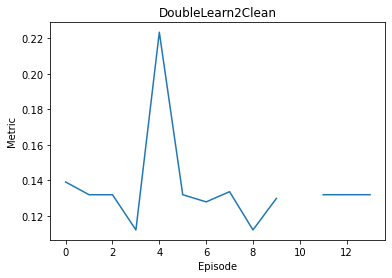

In [19]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql
import learn2clean.imputation.imputer as imp

# the results of learn2clean cleaning are stored in 'house_example'_results.txt in 'save' directory

d_not_enc = rd.Reader(sep=',',verbose=True, encoding=False) 
house  = ["../datasets/house/house_train.csv","../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SalePrice')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')
dataset['test']

# according to the profiling of House dataset:
#               missing_fraction
# PoolQC                 0.995205
# MiscFeature            0.963014
# Alley                  0.937671
# Fence                  0.807534

# the dataframes train and test will be empty for many leanr2clean episodes
# returning None for accuracy
print(len(dataset['train'].dropna()), len(dataset['test'].dropna()))
# for this particular case, we can impute data first and then run leanr2clean
d1 = imp.Imputer(dataset.copy(), strategy = 'MF',verbose=False).transform()
print(len(d1['train'].dropna()), len(d1['test'].dropna()))

# Learn2clean finds the best strategy 'LC -> LOF -> MARS' for maximal MSE : 0.2232924236591108 for MARS
# in  98.62 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'MARS', 'SalePrice', None, 'LC -> LOF -> MARS', 'MSE', 0.2232924236591108, 98.62206888198853)

l2c_c1assification1=ql.Qlearner(dataset = d1.copy(),goal='MARS',target_goal='SalePrice',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()



### Classification with Learn2Clean

In [20]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql
import learn2clean.imputation.imputer as imp

# the results of learn2clean cleaning are stored in 'house_example'_results.txt in 'save' directory

d_not_enc = rd.Reader(sep=',',verbose=True, encoding=True) 
house  = ["../datasets/house/house_train.csv","../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SaleCondition')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')
dataset['test']

# according to the profiling of House dataset:
#               missing_fraction
# PoolQC                 0.995205
# MiscFeature            0.963014
# Alley                  0.937671
# Fence                  0.807534

# the dataframes train and test will be empty for many leanr2clean episodes
# returning None for accuracy
print(len(dataset['train'].dropna()), len(dataset['test'].dropna()))
# for this particular case, we can impute data first and then run leanr2clean
d2 = imp.Imputer(dataset.copy(), strategy = 'MF',verbose=False).transform()
print(len(d1['train'].dropna()), len(d2['test'].dropna()))
# Learn2clean finds the best strategy 'ZSB -> ED -> LDA' for maximal accuracy : 0.8241517694272164 for LDA
# in  4.58 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'LDA', 'SaleCondition', None, 'ZSB -> ED -> LDA', 'accuracy', 0.8241517694272164, 4.3612353801727295)
# l2c_c1assification1=ql.Qlearner(dataset = d2,goal='CART',target_goal='SaleCondition',
#                                 target_prepare=None, file_name = 'house_example2', verbose = False)
# l2c_c1assification1.learn2clean()



Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.3857898712158203 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8

CPU time: 0.24577999114990234 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64        

- 0 non-numerical missing values
* For test dataset
Before imputation:
Total 13964 missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC', 'TotalBsmtSF', 'Utilities']
- 678 numerical missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']
- 13286 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQu

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.14322185516357422 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.050868988037109375 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02379608154296875 seconds


>>Regression task


const            1.531489
1stFlrSF        -0.149627
2ndFlrSF        -0.155687
3SsnPorch       -0.138188
BedroomAbvGr     0.203932
BsmtFinSF1       0.124322
BsmtFinSF2       0.030323
BsmtFullBath    -0.025433
BsmtHalfBath    -0.056564
BsmtUnfSF       -0.033515
EnclosedPorch   -0.109266
Fireplaces       0.067215
FullBath         0.235800
GarageArea      -0.012891
GarageCars       0.116613
GarageYrBlt     -0.276332
GrLivArea       -0.047313
HalfBath         0.067569
Id               0.024218
KitchenAbvGr    -0.029776
LotArea         -0.000888
LotFrontage     -0.094731
LowQualFinSF    -0.156290
MSSubClass       0.068199
MasVnrArea      -0.001818
MiscVal          0.049445
MoSold          -0.113740
OpenPorchSF      0.016797
OverallCond      0.070545
OverallQual      0.075597
PoolArea        -0.115886
SaleCondition    4.824493
ScreenPorch     -0.052232
TotRmsAbvGrd    -0.064032
TotalBsmtSF     -0.081844
WoodDeckSF       0.094647
YearBuilt       -0.368963
YearRemodAdd    -0.103531
YrSold      

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,0.213739,0.856359,0.0,0.555556,0.730254,0.0,0.777778,0.000000,0.179671,...,0.333333,0.722222,0.0,0.0,0.888889,0.327360,0.000000,0.777778,0.740741,0.555556
1,1.0,0.662668,0.000000,0.0,0.555556,0.868564,0.0,0.000000,0.944444,0.316649,...,0.944444,0.500000,0.0,0.0,0.444444,0.723879,0.893884,0.543210,0.365079,0.333333
2,1.0,0.300985,0.864704,0.0,0.555556,0.579254,0.0,0.777778,0.000000,0.466648,...,0.333333,0.722222,0.0,0.0,0.444444,0.415278,0.000000,0.750000,0.703704,0.555556
3,1.0,0.353952,0.788209,0.0,0.555556,0.414793,0.0,0.777778,0.000000,0.556994,...,0.333333,0.722222,0.0,0.0,0.722222,0.212963,0.000000,0.090147,0.311111,0.000000
4,1.0,0.562411,0.903417,0.0,0.888889,0.696118,0.0,0.777778,0.000000,0.514470,...,0.333333,0.888889,0.0,0.0,0.904762,0.645370,0.795414,0.736111,0.644444,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,0.055396,0.661124,0.0,0.555556,0.000000,0.0,0.000000,0.000000,0.561564,...,0.888889,0.083333,0.0,0.0,0.166667,0.097222,0.000000,0.469136,0.311111,0.000000
2915,1.0,0.055396,0.661124,0.0,0.555556,0.430066,0.0,0.000000,0.000000,0.327077,...,0.333333,0.083333,0.0,0.0,0.444444,0.097222,0.000000,0.469136,0.311111,0.000000
2916,1.0,0.630106,0.000000,0.0,0.888889,0.893722,0.0,0.777778,0.000000,0.000000,...,0.888889,0.222222,0.0,0.0,0.722222,0.700751,0.910470,0.333333,0.555556,0.000000
2917,1.0,0.364261,0.000000,0.0,0.555556,0.478610,0.0,0.000000,0.944444,0.583651,...,0.333333,0.222222,0.0,0.0,0.444444,0.404167,0.576305,0.648148,0.511111,0.000000


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.05247688293457031 seconds
End Pipeline CPU time: 0.1275646686553955 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.031517982482910156 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 0.733483076095581 seconds


>>Regression task


const           -1.937513e-14
1stFlrSF         2.480655e-15
2ndFlrSF         1.583803e-15
3SsnPorch        1.825363e-15
BedroomAbvGr    -2.074729e-15
BsmtFinSF1      -2.393918e-16
BsmtFinSF2      -5.984796e-17
BsmtFullBath    -1.058181e-15
BsmtHalfBath     1.124101e-15
BsmtUnfSF        1.424208e-15
EnclosedPorch    3.188422e-15
Fireplaces      -5.538105e-16
FullBath        -4.704570e-15
GarageArea      -1.075529e-15
GarageCars       2.473716e-15
GarageYrBlt     -1.804112e-16
GrLivArea        3.944761e-15
HalfBath        -3.001072e-15
Id               4.496403e-15
KitchenAbvGr     9.367507e-16
LotArea          5.325601e-15
LotFrontage     -3.230055e-15
LowQualFinSF     9.280771e-16
MSSubClass       2.754307e-15
MasVnrArea      -2.359224e-16
MiscVal          6.303985e-15
MoSold           4.529363e-15
OpenPorchSF      2.485859e-15
OverallCond     -2.810252e-16
OverallQual     -4.210174e-15
PoolArea        -1.908196e-17
SaleCondition    5.000000e+00
ScreenPorch      6.487866e-16
TotRmsAbvG

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,0.109641,0.413559,0.0,0.375,0.125089,0.0,0.333333,0.0,0.064212,...,0.500,0.666667,0.0,0.0,0.461538,0.140098,0.000000,0.949275,0.883333,0.50
1,1.0,0.194917,0.000000,0.0,0.375,0.173281,0.0,0.000000,0.5,0.121575,...,0.875,0.555556,0.0,0.0,0.307692,0.206547,0.209270,0.753623,0.433333,0.25
2,1.0,0.123083,0.419370,0.0,0.375,0.086109,0.0,0.333333,0.0,0.185788,...,0.500,0.666667,0.0,0.0,0.307692,0.150573,0.000000,0.934783,0.866667,0.50
3,1.0,0.131695,0.366102,0.0,0.375,0.038271,0.0,0.333333,0.0,0.231164,...,0.500,0.666667,0.0,0.0,0.384615,0.123732,0.000000,0.311594,0.333333,0.00
4,1.0,0.170342,0.509927,0.0,0.500,0.116052,0.0,0.333333,0.0,0.209760,...,0.500,0.777778,0.0,0.0,0.538462,0.187398,0.134831,0.927536,0.833333,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,0.044528,0.264407,0.0,0.375,0.000000,0.0,0.000000,0.0,0.233733,...,0.750,0.333333,0.0,0.0,0.230769,0.089362,0.000000,0.710145,0.333333,0.00
2915,1.0,0.044528,0.264407,0.0,0.375,0.044649,0.0,0.000000,0.0,0.125856,...,0.500,0.333333,0.0,0.0,0.307692,0.089362,0.000000,0.710145,0.333333,0.00
2916,1.0,0.186936,0.000000,0.0,0.500,0.216867,0.0,0.333333,0.0,0.000000,...,0.750,0.444444,0.0,0.0,0.384615,0.200327,0.332865,0.637681,0.766667,0.00
2917,1.0,0.133585,0.000000,0.0,0.375,0.059709,0.0,0.000000,0.5,0.246147,...,0.500,0.444444,0.0,0.0,0.307692,0.149264,0.056180,0.869565,0.700000,0.00


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.05679798126220703 seconds
End Pipeline CPU time: 0.8222830295562744 seconds


Strategy# 2 : Greedy traversal for starting state ZS
ZS -> ED -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.08551907539367676 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.038728952407836914 seconds


>>Regression task


const            3.779034e+00
1stFlrSF        -3.582204e-16
2ndFlrSF        -7.129713e-16
3SsnPorch       -5.305543e-16
BedroomAbvGr    -3.048777e-16
BsmtFinSF1       9.905271e-16
BsmtFinSF2       2.963125e-16
BsmtFullBath    -3.972517e-16
BsmtHalfBath     3.799044e-16
BsmtUnfSF        2.797242e-16
EnclosedPorch    1.984090e-17
Fireplaces       4.134334e-16
FullBath        -7.147061e-16
GarageArea      -6.713380e-16
GarageCars       1.799776e-16
GarageYrBlt      6.357762e-16
GrLivArea        1.647987e-15
HalfBath         3.720982e-16
Id               2.239528e-15
KitchenAbvGr     4.093947e-16
LotArea         -1.361758e-16
LotFrontage     -4.547144e-16
LowQualFinSF    -6.067737e-16
MSSubClass      -6.071532e-17
MasVnrArea       1.155760e-16
MiscVal         -5.143455e-16
MoSold           6.852158e-16
OpenPorchSF      9.114888e-16
OverallCond     -4.553649e-17
OverallQual     -1.001803e-16
PoolArea        -2.589075e-16
ScreenPorch     -5.148876e-16
TotRmsAbvGrd    -8.500145e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,-0.773728,1.207172,-0.103313,0.169898,0.581046,-0.292975,1.087148,-0.249676,-0.934005,...,-0.507197,0.646073,-0.063139,-0.285886,0.986680,-0.443002,-0.740634,1.046078,0.896679,0.157619
1,1.0,0.261030,-0.784891,-0.103313,0.169898,1.178053,-0.292975,-0.818789,3.821854,-0.629176,...,2.187904,-0.063174,-0.063139,-0.285886,-0.287709,0.477381,1.614603,0.154737,-0.395536,-0.602858
2,1.0,-0.610614,1.235163,-0.103313,0.169898,0.098173,-0.292975,1.087148,-0.249676,-0.287950,...,-0.507197,0.646073,-0.063139,-0.285886,-0.287709,-0.297917,-0.740634,0.980053,0.848819,0.157619
3,1.0,-0.506118,0.978574,-0.103313,0.169898,-0.494445,-0.292975,1.087148,-0.249676,-0.046816,...,-0.507197,0.646073,-0.063139,-0.285886,0.349486,-0.669697,-0.740634,-1.859033,-0.682695,-1.363335
4,1.0,-0.037164,1.671364,-0.103313,1.385418,0.469107,-0.292975,1.087148,-0.249676,-0.160558,...,-0.507197,1.355319,-0.063139,-0.285886,1.623875,0.212148,0.776834,0.947040,0.753100,0.157619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,-1.563815,0.488723,-0.103313,0.169898,-0.968539,-0.292975,-0.818789,-0.249676,-0.033167,...,1.289537,-1.481667,-0.063139,-0.285886,-0.924904,-1.145758,-0.740634,-0.043338,-0.682695,-1.363335
2915,1.0,-1.563815,0.488723,-0.103313,0.169898,-0.415429,-0.292975,-0.818789,-0.249676,-0.606427,...,-0.507197,-1.481667,-0.063139,-0.285886,-0.287709,-1.145758,-0.740634,-0.043338,-0.682695,-1.363335
2916,1.0,0.164181,-0.784891,-0.103313,1.385418,1.717993,-0.292975,1.087148,-0.249676,-1.275231,...,1.289537,-0.772420,-0.063139,-0.285886,0.349486,0.391237,3.005615,-0.373465,0.561660,-1.363335
2917,1.0,-0.483181,-0.784891,-0.103313,0.169898,-0.228864,-0.292975,-0.818789,3.821854,0.032803,...,-0.507197,-0.772420,-0.063139,-0.285886,-0.287709,-0.316053,-0.108355,0.682939,0.370221,-1.363335


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.049005985260009766 seconds
End Pipeline CPU time: 0.17353296279907227 seconds


Strategy# 3 : Greedy traversal for starting state WR
WR -> IQR -> OLS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
79 features 
Apply WR feature selection
Input variables must be non-negative. WR feature selection is only applied to positive variables.
After feature selection:
37 features remain
['MSSubClass', 'MasVnrArea', 'HalfBath', 'GarageCars', 'OpenPorchSF', 'BsmtUnfSF', 'YearRemodAdd', 'BedroomAbvGr', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'Fireplaces', 'EnclosedPorch', 'Id', 'GarageArea', 'BsmtHalfBath', 'LowQualFinSF', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF', 'LotFrontage', 'LotArea', 'FullBath', 'MoSold', 'WoodDeckSF', 'OverallQual', 'PoolArea', 'TotRmsAbvGrd', '2ndFlrSF', '3SsnPorch', 'ScreenPorch', 'YearBuilt', 'KitchenAbvGr', 'BsmtFullBath', 'MiscVal', 'YrSold', 'GrLivArea']
Feature selection done -- CPU time: 0.0

const            5.240697e-12
1stFlrSF        -2.708894e-15
2ndFlrSF        -2.751337e-15
3SsnPorch        1.088970e-16
BedroomAbvGr    -1.734723e-18
BsmtFinSF1      -1.261090e-15
BsmtFinSF2      -1.687294e-17
BsmtFullBath     8.326673e-16
BsmtHalfBath    -1.408595e-15
BsmtUnfSF       -1.269164e-15
EnclosedPorch   -7.621277e-17
Fireplaces      -1.864828e-16
FullBath         3.868433e-16
GarageArea      -1.135702e-17
GarageCars      -6.956241e-16
GarageYrBlt     -2.005910e-16
GrLivArea        2.749426e-15
HalfBath         3.642919e-16
Id               1.269237e-17
KitchenAbvGr    -1.193490e-15
LotArea          3.877907e-17
LotFrontage     -5.377643e-17
LowQualFinSF     2.442983e-17
MSSubClass       8.646512e-18
MasVnrArea       5.512490e-18
MiscVal          1.125006e-18
MoSold          -8.798185e-15
OpenPorchSF      2.005096e-17
OverallCond      1.036497e-16
OverallQual      4.666406e-16
PoolArea         0.000000e+00
ScreenPorch      0.000000e+00
TotRmsAbvGrd    -2.327782e-16
TotalBsmtS

,const,MSSubClass,MasVnrArea,HalfBath,GarageCars,OpenPorchSF,BsmtUnfSF,YearRemodAdd,BedroomAbvGr,OverallCond,...,TotRmsAbvGrd,2ndFlrSF,3SsnPorch,ScreenPorch,YearBuilt,KitchenAbvGr,BsmtFullBath,MiscVal,YrSold,GrLivArea
0,1.0,60.0,196.0,1.0,2.0,61.0,150.0,2003.0,3.0,5.0,...,8.0,854.0,0.0,0.0,2003.0,1.0,1.0,0.0,2008.0,1710.0
1,1.0,20.0,0.0,0.0,2.0,0.0,284.0,1976.0,3.0,8.0,...,6.0,0.0,0.0,0.0,1976.0,1.0,0.0,0.0,2007.0,1262.0
2,1.0,60.0,162.0,1.0,2.0,42.0,434.0,2002.0,3.0,5.0,...,6.0,866.0,0.0,0.0,2001.0,1.0,1.0,0.0,2008.0,1786.0
2049,1.0,60.0,0.0,1.0,2.0,0.0,242.0,1971.0,4.0,6.0,...,7.0,825.0,0.0,0.0,1971.0,1.0,0.0,0.0,2008.0,1670.0
4,1.0,60.0,350.0,1.0,3.0,84.0,490.0,2000.0,4.0,5.0,...,9.0,1053.0,0.0,0.0,2000.0,1.0,1.0,0.0,2008.0,2198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1.0,120.0,260.0,0.0,2.0,113.0,416.0,2000.0,2.0,5.0,...,5.0,0.0,0.0,0.0,1999.0,1.0,1.0,0.0,2008.0,1557.0
2523,1.0,80.0,113.0,0.0,2.0,0.0,513.0,1976.0,3.0,5.0,...,6.0,0.0,0.0,0.0,1976.0,1.0,0.0,0.0,2007.0,1025.0
2041,1.0,60.0,0.0,1.0,2.0,112.0,952.0,2002.0,3.0,5.0,...,7.0,860.0,0.0,0.0,2002.0,1.0,0.0,0.0,2008.0,1812.0
2045,1.0,90.0,0.0,0.0,2.0,0.0,1625.0,1965.0,4.0,6.0,...,8.0,0.0,0.0,0.0,1965.0,2.0,0.0,0.0,2008.0,1625.0


(39,)

(1329, 38)

(38,)

(1329, 38)

MODIFICATION
Regression done -- CPU time: 0.056121826171875 seconds
End Pipeline CPU time: 0.09986400604248047 seconds


Strategy# 4 : Greedy traversal for starting state LC
LC -> LOF -> OLS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
79 features 
Apply LC feature selection with threshold= 0.3
22 features with linear correlation greater than 0.30.

List of correlated variables to be removed : ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
After feature selection:
56 features remain
['Heating', 'Fence', 'LandSlope', 'BsmtFinType1', 'MSZoning', 'LotShape', 'BsmtFinSF2', 'Utilities', 'EnclosedPorch', 'Id', 'GarageFinish', 'Electrical', 'CentralAir', 'MasVnrType', 'GarageType', 'BsmtHalfBath', '

const            6.434853e-13
Id              -2.120547e-18
EnclosedPorch    2.386939e-18
KitchenAbvGr     6.505213e-17
MoSold          -1.636061e-16
YrSold          -4.642554e-16
WoodDeckSF       5.683591e-19
BsmtHalfBath    -1.181130e-15
MiscVal          4.543538e-19
LowQualFinSF     1.020675e-18
PoolArea         1.279020e-19
2ndFlrSF        -1.084202e-18
1stFlrSF        -3.150010e-18
3SsnPorch       -9.085911e-18
ScreenPorch      6.989716e-18
SaleCondition    1.000000e+00
BsmtFinSF2       5.135137e-19
dtype: float64

,const,BsmtFinSF2,EnclosedPorch,Id,BsmtHalfBath,LowQualFinSF,1stFlrSF,YrSold,MoSold,WoodDeckSF,PoolArea,2ndFlrSF,3SsnPorch,ScreenPorch,KitchenAbvGr,MiscVal
0,1.0,0.0,0.0,1.0,0.0,0.0,856.0,2008.0,2.0,0.0,0.0,854.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,2.0,1.0,0.0,1262.0,2007.0,5.0,298.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,3.0,0.0,0.0,920.0,2008.0,9.0,0.0,0.0,866.0,0.0,0.0,1.0,0.0
3,1.0,0.0,272.0,4.0,0.0,0.0,961.0,2006.0,2.0,0.0,0.0,756.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,5.0,0.0,0.0,1145.0,2008.0,12.0,192.0,0.0,1053.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,0.0,0.0,2915.0,0.0,0.0,546.0,2006.0,6.0,0.0,0.0,546.0,0.0,0.0,1.0,0.0
2915,1.0,0.0,0.0,2916.0,0.0,0.0,546.0,2006.0,4.0,0.0,0.0,546.0,0.0,0.0,1.0,0.0
2916,1.0,0.0,0.0,2917.0,0.0,0.0,1224.0,2006.0,9.0,474.0,0.0,0.0,0.0,0.0,1.0,0.0
2917,1.0,0.0,0.0,2918.0,1.0,0.0,970.0,2006.0,7.0,80.0,0.0,0.0,0.0,0.0,1.0,700.0


(17,)

(2889, 16)

(16,)

(2889, 16)

MODIFICATION
Regression done -- CPU time: 0.045845985412597656 seconds
End Pipeline CPU time: 0.34963202476501465 seconds


Strategy# 5 : Greedy traversal for starting state Tree
Tree -> ED -> OLS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.04270601272583008 seconds


>>Regression task


const            1.225686e-12
1stFlrSF        -1.276174e-16
2ndFlrSF        -1.260597e-16
3SsnPorch        4.633567e-17
BedroomAbvGr    -2.090342e-16
BsmtFinSF1      -2.797724e-16
BsmtFinSF2      -2.799355e-16
BsmtFullBath     1.061651e-15
BsmtHalfBath    -6.938894e-17
BsmtUnfSF       -2.887946e-16
EnclosedPorch    1.886173e-17
Fireplaces      -1.310367e-15
FullBath         1.033028e-15
GarageArea       8.070530e-18
GarageCars      -5.898060e-17
GarageYrBlt     -2.233456e-17
GrLivArea        1.506330e-16
HalfBath         3.989864e-17
Id               3.532127e-18
KitchenAbvGr    -1.372166e-15
LotArea          5.603176e-18
LotFrontage     -2.641388e-17
LowQualFinSF    -1.839171e-16
MSSubClass      -2.028136e-16
MasVnrArea       6.091861e-18
MiscVal         -1.076875e-17
MoSold          -1.982681e-15
OpenPorchSF      1.186354e-17
OverallCond      1.088539e-16
OverallQual     -4.228388e-17
PoolArea         6.644126e-18
ScreenPorch     -1.209699e-16
TotRmsAbvGrd     7.927686e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.05526590347290039 seconds
End Pipeline CPU time: 0.09822416305541992 seconds


Strategy# 6 : Greedy traversal for starting state ZSB
ZSB -> ED -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
178 outlying rows have been removed:
* For test dataset
146 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.04341387748718262 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2741
After deduplication: Number of rows: 2741
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2773
After deduplication: Number of rows: 2773
Deduplication done -- CPU time: 0.03772592544555664 seconds


>>Regression task


const            4.111156e-12
1stFlrSF         4.950653e-17
2ndFlrSF         3.886865e-17
3SsnPorch        6.293243e-17
BedroomAbvGr    -1.667937e-15
BsmtFinSF1       3.502430e-16
BsmtFinSF2       3.526304e-16
BsmtFullBath     8.812395e-16
BsmtHalfBath    -2.298509e-16
BsmtUnfSF        3.541648e-16
EnclosedPorch    4.859428e-17
Fireplaces      -1.188773e-15
FullBath         6.574602e-16
GarageArea       4.939896e-18
GarageCars      -5.568462e-16
GarageYrBlt     -3.646646e-17
GrLivArea       -5.020449e-17
HalfBath         8.970282e-16
Id              -1.241496e-17
KitchenAbvGr    -1.681814e-15
LotArea          5.525216e-18
LotFrontage      1.488406e-17
LowQualFinSF     9.007433e-17
MSSubClass      -1.301381e-17
MasVnrArea      -2.163661e-17
MiscVal         -9.701254e-18
MoSold          -6.152197e-15
OpenPorchSF      1.756543e-16
OverallCond      3.652135e-16
OverallQual      6.563760e-16
PoolArea         6.818107e-17
ScreenPorch      7.828956e-17
TotRmsAbvGrd     9.662410e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
5,1.0,796.0,566.0,320.0,1.0,732.0,0.0,1.0,0.0,64.0,...,5.0,5.0,0.0,0.0,5.0,796.0,40.0,1993.0,1995.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2773, 38)

(38,)

(2773, 38)

MODIFICATION
Regression done -- CPU time: 0.05111980438232422 seconds
End Pipeline CPU time: 0.13254809379577637 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.32063722610473633 seconds


>>Regression task


const            3.319567e-13
1stFlrSF         1.274683e-16
2ndFlrSF         1.270918e-16
3SsnPorch       -1.443679e-16
BedroomAbvGr    -1.353084e-16
BsmtFinSF1       6.564488e-16
BsmtFinSF2       6.664544e-16
BsmtFullBath     1.744264e-15
BsmtHalfBath    -1.222113e-15
BsmtUnfSF        6.452155e-16
EnclosedPorch   -4.261253e-17
Fireplaces      -3.653761e-16
FullBath        -4.119968e-18
GarageArea      -6.030875e-18
GarageCars      -2.905662e-16
GarageYrBlt     -4.892123e-17
GrLivArea       -1.592892e-16
HalfBath         1.122176e-15
Id               2.912015e-17
KitchenAbvGr     7.741204e-16
LotArea          8.582581e-18
LotFrontage      1.210461e-16
LowQualFinSF     2.380603e-16
MSSubClass       2.308504e-17
MasVnrArea       8.351745e-18
MiscVal          1.275632e-17
MoSold          -1.718894e-15
OpenPorchSF     -3.342392e-17
OverallCond     -1.788934e-17
OverallQual      1.866996e-16
PoolArea        -4.937313e-17
ScreenPorch      2.416246e-17
TotRmsAbvGrd     5.525094e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2889, 38)

(38,)

(2889, 38)

MODIFICATION
Regression done -- CPU time: 0.06190800666809082 seconds
End Pipeline CPU time: 0.38265085220336914 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
1594 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.03212308883666992 seconds


>>Regression task


const            5.240697e-12
1stFlrSF        -2.708894e-15
2ndFlrSF        -2.751337e-15
3SsnPorch        1.088970e-16
BedroomAbvGr    -1.734723e-18
BsmtFinSF1      -1.261090e-15
BsmtFinSF2      -1.687294e-17
BsmtFullBath     8.326673e-16
BsmtHalfBath    -1.408595e-15
BsmtUnfSF       -1.269164e-15
EnclosedPorch   -7.621277e-17
Fireplaces      -1.864828e-16
FullBath         3.868433e-16
GarageArea      -1.135702e-17
GarageCars      -6.956241e-16
GarageYrBlt     -2.005910e-16
GrLivArea        2.749426e-15
HalfBath         3.642919e-16
Id               1.269237e-17
KitchenAbvGr    -1.193490e-15
LotArea          3.877907e-17
LotFrontage     -5.377643e-17
LowQualFinSF     2.442983e-17
MSSubClass       8.646512e-18
MasVnrArea       5.512490e-18
MiscVal          1.125006e-18
MoSold          -8.798185e-15
OpenPorchSF      2.005096e-17
OverallCond      1.036497e-16
OverallQual      4.666406e-16
PoolArea         0.000000e+00
ScreenPorch      0.000000e+00
TotRmsAbvGrd    -2.327782e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
2049,1.0,845.0,825.0,0.0,4.0,583.0,0.0,0.0,0.0,242.0,...,6.0,7.0,0.0,0.0,7.0,825.0,0.0,1971.0,1971.0,2008.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1.0,1557.0,0.0,0.0,2.0,1141.0,0.0,1.0,0.0,416.0,...,5.0,9.0,0.0,0.0,5.0,1557.0,124.0,1999.0,2000.0,2008.0
2523,1.0,1025.0,0.0,0.0,3.0,502.0,0.0,0.0,0.0,513.0,...,5.0,5.0,0.0,0.0,6.0,1015.0,127.0,1976.0,1976.0,2007.0
2041,1.0,952.0,860.0,0.0,3.0,0.0,0.0,0.0,0.0,952.0,...,5.0,7.0,0.0,0.0,7.0,952.0,144.0,2002.0,2002.0,2008.0
2045,1.0,1625.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1625.0,...,6.0,5.0,0.0,0.0,8.0,1625.0,0.0,1965.0,1965.0,2008.0


(39,)

(1329, 38)

(38,)

(1329, 38)

MODIFICATION
Regression done -- CPU time: 0.05256509780883789 seconds
End Pipeline CPU time: 0.08488202095031738 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> OLS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.04120683670043945 seconds

>>Regression task


const            4.578560e-12
1stFlrSF        -4.567964e-17
2ndFlrSF        -4.955990e-17
3SsnPorch        3.771986e-17
BedroomAbvGr     5.004677e-16
BsmtFinSF1      -1.074822e-15
BsmtFinSF2      -1.056270e-15
BsmtFullBath    -1.202163e-15
BsmtHalfBath    -1.762479e-15
BsmtUnfSF       -1.062027e-15
EnclosedPorch    1.303330e-17
Fireplaces       3.337174e-16
FullBath         1.006140e-16
GarageArea      -6.789816e-18
GarageCars      -4.874573e-16
GarageYrBlt      7.673441e-17
GrLivArea        3.057789e-17
HalfBath        -8.586881e-17
Id              -2.031524e-17
KitchenAbvGr     6.791442e-16
LotArea         -3.761594e-18
LotFrontage      6.023421e-17
LowQualFinSF    -1.812651e-19
MSSubClass      -3.958354e-17
MasVnrArea      -2.115041e-18
MiscVal          1.479555e-18
MoSold          -8.558041e-15
OpenPorchSF      6.918396e-17
OverallCond     -2.775558e-17
OverallQual      1.301043e-17
PoolArea        -7.037150e-18
ScreenPorch      2.185345e-19
TotRmsAbvGrd    -8.985868e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2554, 38)

(38,)

(2554, 38)

MODIFICATION
Regression done -- CPU time: 0.05313587188720703 seconds
End Pipeline CPU time: 0.0945899486541748 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> OLS

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.011631965637207031 seconds

>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU time: 0.004523038864135742 seconds
End Pipeline CPU time: 0.016389846801757812 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> OLS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.044852256774902344 seconds


const            1.225686e-12
1stFlrSF        -1.276174e-16
2ndFlrSF        -1.260597e-16
3SsnPorch        4.633567e-17
BedroomAbvGr    -2.090342e-16
BsmtFinSF1      -2.797724e-16
BsmtFinSF2      -2.799355e-16
BsmtFullBath     1.061651e-15
BsmtHalfBath    -6.938894e-17
BsmtUnfSF       -2.887946e-16
EnclosedPorch    1.886173e-17
Fireplaces      -1.310367e-15
FullBath         1.033028e-15
GarageArea       8.070530e-18
GarageCars      -5.898060e-17
GarageYrBlt     -2.233456e-17
GrLivArea        1.506330e-16
HalfBath         3.989864e-17
Id               3.532127e-18
KitchenAbvGr    -1.372166e-15
LotArea          5.603176e-18
LotFrontage     -2.641388e-17
LowQualFinSF    -1.839171e-16
MSSubClass      -2.028136e-16
MasVnrArea       6.091861e-18
MiscVal         -1.076875e-17
MoSold          -1.982681e-15
OpenPorchSF      1.186354e-17
OverallCond      1.088539e-16
OverallQual     -4.228388e-17
PoolArea         6.644126e-18
ScreenPorch     -1.209699e-16
TotRmsAbvGrd     7.927686e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.05336403846740723 seconds
End Pipeline CPU time: 0.09843611717224121 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> OLS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 0.6114051342010498 seconds


>>Regression task


const            1.225686e-12
1stFlrSF        -1.276174e-16
2ndFlrSF        -1.260597e-16
3SsnPorch        4.633567e-17
BedroomAbvGr    -2.090342e-16
BsmtFinSF1      -2.797724e-16
BsmtFinSF2      -2.799355e-16
BsmtFullBath     1.061651e-15
BsmtHalfBath    -6.938894e-17
BsmtUnfSF       -2.887946e-16
EnclosedPorch    1.886173e-17
Fireplaces      -1.310367e-15
FullBath         1.033028e-15
GarageArea       8.070530e-18
GarageCars      -5.898060e-17
GarageYrBlt     -2.233456e-17
GrLivArea        1.506330e-16
HalfBath         3.989864e-17
Id               3.532127e-18
KitchenAbvGr    -1.372166e-15
LotArea          5.603176e-18
LotFrontage     -2.641388e-17
LowQualFinSF    -1.839171e-16
MSSubClass      -2.028136e-16
MasVnrArea       6.091861e-18
MiscVal         -1.076875e-17
MoSold          -1.982681e-15
OpenPorchSF      1.186354e-17
OverallCond      1.088539e-16
OverallQual     -4.228388e-17
PoolArea         6.644126e-18
ScreenPorch     -1.209699e-16
TotRmsAbvGrd     7.927686e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.055821895599365234 seconds
End Pipeline CPU time: 0.6674890518188477 seconds

Start pipeline
-------------

>>Regression task


const            2.008171e-12
1stFlrSF        -1.432638e-16
2ndFlrSF        -1.547461e-16
3SsnPorch       -7.298078e-17
BedroomAbvGr    -1.106320e-15
BsmtFinSF1      -2.529520e-16
BsmtFinSF2      -2.525196e-16
BsmtFullBath     1.405993e-15
BsmtHalfBath     2.411266e-15
BsmtUnfSF       -2.826672e-16
EnclosedPorch   -8.507599e-18
Fireplaces      -6.980094e-16
FullBath         9.176687e-16
GarageArea       1.486712e-17
GarageCars      -4.440892e-16
GarageYrBlt      4.325967e-17
GrLivArea        7.981253e-17
HalfBath         3.616898e-16
Id               6.428421e-16
KitchenAbvGr    -3.456437e-15
LotArea          2.342861e-17
LotFrontage      2.343910e-17
LowQualFinSF    -1.603971e-16
MSSubClass      -1.463334e-17
MasVnrArea       4.709503e-19
MiscVal          1.979516e-18
MoSold          -1.793054e-15
OpenPorchSF     -2.561766e-17
OverallCond     -9.128982e-17
OverallQual      4.998172e-17
PoolArea        -1.966811e-17
ScreenPorch     -3.262771e-18
TotRmsAbvGrd     1.195224e-15
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(40,)

(2919, 39)

(39,)

(2919, 39)

MODIFICATION
Regression done -- CPU time: 0.06447792053222656 seconds
End Pipeline CPU time: 0.06465697288513184 seconds

==== Recap ====

List of strategies tried by Learn2Clean:
['DS -> IQR -> OLS', 'MM -> AD -> OLS', 'ZS -> ED -> OLS', 'WR -> IQR -> OLS', 'LC -> LOF -> OLS', 'Tree -> ED -> OLS', 'ZSB -> ED -> OLS', 'LOF -> OLS', 'IQR -> OLS', 'CC -> OLS', 'PC -> OLS', 'ED -> OLS', 'AD -> OLS']

List of corresponding quality metrics ****
 [{'quality_metric': 1.1626034529274651}, {'quality_metric': 1.1626034529274651}, {'quality_metric': 1.1626034529274651}, {'quality_metric': 1.0715761272302342}, {'quality_metric': 1.1381383584117424}, {'quality_metric': 1.1626034529274651}, {'quality_metric': 1.0906366422825065}, {'quality_metric': 1.1677434417875043}, {'quality_metric': 1.0715761272302342}, {'quality_metric': 1.1114991774996543}, {'quality_metric': None}, {'quality_metric': 1.1626034529274651}, {'quality_metric': 1.1626034529274651}, {'quality_metric': 1.1626034529274651}]

Strateg

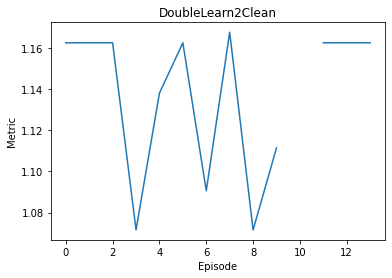

In [21]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='OLS',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.14460015296936035 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> CART

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.059773921966552734 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.028524160385131836 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.885576425175352

Classification done -- CPU time: 89.12417793273926 seconds
End Pipeline CPU time: 89.21277594566345 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> CART

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test 

Avg accuracy of CART classification for 10 cross-validation : 0.8907506127450979

Classification done -- CPU time: 82.65156197547913 seconds
End Pipeline CPU time: 82.6825339794159 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> CART

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.009196996688842773 seconds

>>Classification task
Error: Need at least one continous variable and 10 observations for classification
Classification done -- CPU time: 0.0018808841705322266 seconds
End Pipeline CPU time: 0.011250972747802734 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> CART

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: 

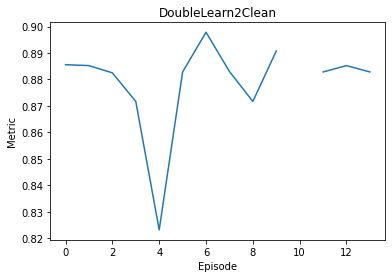

In [22]:
l2c_c1assification1=ql.Qlearner(dataset = d2,goal='CART',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()


Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.14883995056152344 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> LDA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.06221485137939453 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02908611297607422 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8197940696799925

Classification done -- CPU time: 0.10253596305847168 seconds
End Pipeline CPU time: 0.19414877891540527 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> LDA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Nor


Accuracy of LDA result for 10 cross-validation : 0.8081386357359844

Classification done -- CPU time: 0.09858298301696777 seconds
End Pipeline CPU time: 0.13797307014465332 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> LDA

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.012289047241210938 seconds

>>Classification task
Error: Need at least one continous variable and 10 observations for classification
Classification done -- CPU time: 0.001729726791381836 seconds
End Pipeline CPU time: 0.014378070831298828 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> LDA

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of 

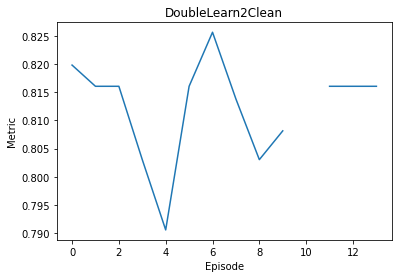

In [23]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='LDA',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.1409299373626709 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> NB

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.058415889739990234 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.028605222702026367 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.07056559807936731

Classification done -- CPU time: 0.06936097145080566 seconds
End Pipeline CPU time: 0.15669703483581543 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> NB

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.24115204811096191 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.016613802383698577

Classification done -- CPU time: 0.06009101867675781 seconds
End Pipeline CPU time: 0.36199283599853516 seconds


Strategy# 5 : Greedy traversal for starting state Tree
Tree -> ED -> NB

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.04559683799743652 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.10413783363931647

Classification done -- CPU time: 0.0687

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.05341696739196777 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.10413783363931647

Classification done -- CPU time: 0.06454801559448242 seconds
End Pipeline CPU time: 0.11804008483886719 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> NB

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 0.8291680812835693 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.10413665678105728

Classification done -- CPU ti

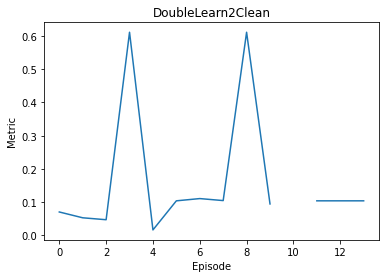

In [24]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='NB',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.12164306640625 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> LASSO

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.052572011947631836 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02470707893371582 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.30323281111505784
Regression done -- CPU time: 0.1027531623840332 seconds
End Pipeline CPU time: 0.18029284477233887 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> LASSO

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... tes

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.46489749933335, tolerance: 1.8897000000000002
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.11535705292556, tolerance: 1.8897000000000002
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411.5681376312805, tolerance: 1.8897000000000002
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/line

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 6.10091514251387e-05
Regression done -- CPU time: 0.16649603843688965 seconds
End Pipeline CPU time: 0.23280906677246094 seconds


Strategy# 4 : Greedy traversal for starting state LC
LC -> LOF -> LASSO

Start pipeline
-------------

>>Feature selection 
Before feature selection:
81 features 
Apply LC feature selection with threshold= 0.3
23 features with linear correlation greater than 0.30.

List of correlated variables to be removed : ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'New_ID']
After feature selection:
57 features remain
['Heating', 'Fence', 'LandSlope', 'BsmtFinType1', 'MSZoning', 'LotShape', 'BsmtFinSF2', 'Utilities', 'EnclosedPorch', 'Id

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 930.9297264653699, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.3428136099335, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1181.8731573301043, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: 

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0001248281690647271
Regression done -- CPU time: 0.21008610725402832 seconds
End Pipeline CPU time: 0.2667059898376465 seconds


Strategy# 6 : Greedy traversal for starting state ZSB
ZSB -> ED -> LASSO

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
178 outlying rows have been removed:
* For test dataset
146 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.06099510192871094 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2741
After deduplication: Number of rows: 2741
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2773
After deduplication: Number of rows: 2773
Deduplication done -- CPU time: 0.054727792739868164 seconds


>>Regression task


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 891.5358785863182, tolerance: 3.7880000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 829.761939259246, tolerance: 3.7880000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1067.5859067469542, tolerance: 3.7880000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 8.46250139820758e-05
Regression done -- CPU time: 0.18532514572143555 seconds
End Pipeline CPU time: 0.3011903762817383 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> LASSO

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.33599209785461426 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.00012924058432723154
Regression done -- CPU time: 0.19647908210754395 seconds
End Pipeline CPU time: 0.5327551364898682 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> LASSO

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924.26684200712, tolerance: 4.0106
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993.719936249011, tolerance: 4.0106
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1169.8801716823687, tolerance: 4.0106
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: Con

1594 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.041274309158325195 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 6.10091514251387e-05
Regression done -- CPU time: 0.16785693168640137 seconds
End Pipeline CPU time: 0.20925307273864746 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> LASSO

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.46489749933335, tolerance: 1.8897000000000002
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.11535705292556, tolerance: 1.8897000000000002
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411.5681376312805, tolerance: 1.8897000000000002
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/line

Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.05245471000671387 seconds

>>Regression task


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 919.722501626037, tolerance: 3.5879000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267.19516668971187, tolerance: 3.5879000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842.6373368438077, tolerance: 3.5879000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 5.016589832337576e-05
Regression done -- CPU time: 0.20662212371826172 seconds
End Pipeline CPU time: 0.2592010498046875 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> LASSO

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.015719175338745117 seconds

>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU time: 0.0065610408782958984 seconds
End Pipeline CPU time: 0.022612810134887695 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> LASSO

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 930.9297264653699, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.3428136099335, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1181.8731573301043, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: 

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0001248281690647271
Regression done -- CPU time: 0.19834685325622559 seconds
End Pipeline CPU time: 0.267179012298584 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> LASSO

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.085845947265625 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.00017427916738648282
Regression done -- CPU time: 0.1689438819885254 seconds
End Pipeline CPU time: 1.254868984222412 seconds

Start pipeline
-------------

>>Regression task


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 954.2456032913869, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.2895663775405, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970.6813033092367, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: C

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 954.9034851239714, tolerance: 4.0575
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 912.7703475726139, tolerance: 4.0575
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534.6438753710136, tolerance: 4.0575
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: C

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0001248281690647271
Regression done -- CPU time: 0.23037409782409668 seconds
End Pipeline CPU time: 0.23041677474975586 seconds

==== Recap ====

List of strategies tried by Learn2Clean:
['DS -> IQR -> LASSO', 'MM -> AD -> LASSO', 'ZS -> ED -> LASSO', 'WR -> IQR -> LASSO', 'LC -> LOF -> LASSO', 'Tree -> ED -> LASSO', 'ZSB -> ED -> LASSO', 'LOF -> LASSO', 'IQR -> LASSO', 'CC -> LASSO', 'PC -> LASSO', 'ED -> LASSO', 'AD -> LASSO']

List of corresponding quality metrics ****
 [{'quality_metric': 0.30323281111505784}, {'quality_metric': 1.6189728459843126e-06}, {'quality_metric': 14.924993816000626}, {'quality_metric': 6.10091514251387e-05}, {'quality_metric': 7.173559678802404e-06}, {'quality_metric': 0.0001248281690647271}, {'quality_metric': 8.46250139820758e-05}, {'quality_metric': 0.00012924058432723154}, {'quality_metric': 6.10091514251387e-05}, {'quality_metric': 5.016589832337576e-05}, {'quality_metric': None},

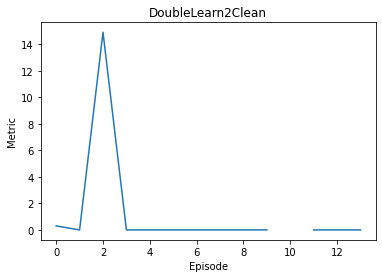

In [25]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='LASSO',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.13069486618041992 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.05570578575134277 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02764105796813965 seconds


>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.2524569437561471
Regression done -- CPU time: 2.8137240409851074 seconds
End Pipeline CPU time: 2.8974368572235107 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization 

MSE of MARS with 10 folds for cross-validation: 0.06622736101601148
Regression done -- CPU time: 0.375244140625 seconds
End Pipeline CPU time: 0.41667890548706055 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> MARS

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.011060953140258789 seconds

>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU time: 0.002683877944946289 seconds
End Pipeline CPU time: 0.01395106315612793 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> MARS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplica

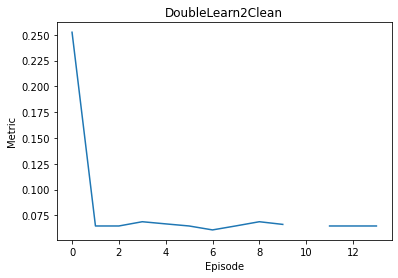

In [26]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='MARS',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.13359689712524414 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> HCA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.060597896575927734 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.028539180755615234 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.1708  for k= 2
Quality of clustering 0.1708
Clustering done -- CPU time: 1.8813209533691406 seconds
End Pipeline CPU time: 1.9711711406707764 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> HCA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train

Best silhouette = 0.3763  for k= 2
Quality of clustering 0.3763
Clustering done -- CPU time: 0.3670997619628906 seconds
End Pipeline CPU time: 0.40425610542297363 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> HCA

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.03815889358520508 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9619  for k= 2
Quality of clustering 0.9619
Clustering done -- CPU time: 1.3173801898956299 seconds
End Pipeline CPU time: 1.355881929397583 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> HCA

Start pipeline
-------------
>>Consistency checking
* For train dataset
* 

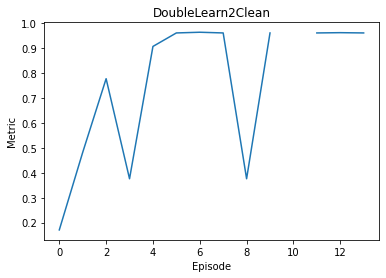

In [27]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='HCA',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start Learn2Clean
Learn2Clean - Pipeline construction -- CPU time: 0.14283490180969238 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.06016206741333008 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.027183055877685547 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.1361  for k= 2
Quality of clustering 0.1361
Clustering done -- CPU time: 1.0260519981384277 seconds
End Pipeline CPU time: 1.1140501499176025 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... 

1594 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.042636871337890625 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.3627  for k= 2
Quality of clustering 0.3627
Clustering done -- CPU time: 0.49840688705444336 seconds
End Pipeline CPU time: 0.5413510799407959 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> KMEANS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.046643972396850586 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.8708  for k= 2
Quality of clusteri

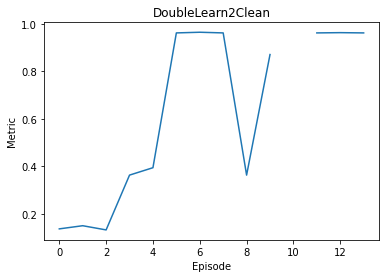

In [28]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='KMEANS',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

## Random data preprocessing pipelines

In [36]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql

# the results of random cleaning are stored in 'house_example2'_results_file.txt in 'save' directory
# appended to the EOF 

random4=ql.Qlearner(d1,goal='CART',target_goal='SalePrice',target_prepare=None, verbose = False)
random4.random_cleaning('house_example2')

random5=ql.Qlearner(d1,goal='LDA',target_goal='SalePrice',target_prepare=None, verbose = False)
random5.random_cleaning('house_example2')

random6=ql.Qlearner(d1,goal='NB',target_goal='SalePrice',target_prepare=None, verbose = False)
random6.random_cleaning('house_example2')

#random preprocessing pipeline for LASSO regression
random1=ql.Qlearner(d1,goal='LASSO',target_goal='SalePrice',target_prepare=None, verbose = False)
random1.random_cleaning('house_example2')

#random preprocessing pipeline for OLS regression
random2=ql.Qlearner(d1,goal='OLS',target_goal='SalePrice',target_prepare=None, verbose = True)
random2.random_cleaning('house_example2')

#random preprocessing pipeline for MARS regression
random3=ql.Qlearner(d1,goal='MARS',target_goal='SalePrice',target_prepare=None, verbose = False)
random3.random_cleaning('house_example2')


random7=ql.Qlearner(d1,goal='HCA',target_goal='SalePrice',target_prepare=None, verbose = False)
random7.random_cleaning('house_example2')

random8=ql.Qlearner(d1,goal='KMEANS',target_goal='SalePrice',target_prepare=None, verbose = False)
random8.random_cleaning('house_example2')




--------------------------
Random cleaning strategy:
 Tree -> LOF -> CART
--------------------------

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.25411391258239746 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.006993006993006994

Classification done -- CPU time: 327.28197407722473 seconds
End Pipeline CPU time: 327.5361909866333 seconds
('house_example2', 'random', 'CART', 'SalePrice', None, 'Tree -> LOF -> CART', 'accuracy', ({'quality_metric': 0.006993006993006994}, 327.5361909866333))


--------------------------
Random cleaning strategy:
 ZS -> IQR -> LDA
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.07088208198547363 seco

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)



Accuracy of LDA result for 10 cross-validation : 0.012251068710249193

Classification done -- CPU time: 0.27344417572021484 seconds
End Pipeline CPU time: 0.3666093349456787 seconds
('house_example2', 'random', 'LDA', 'SalePrice', None, 'ZS -> IQR -> LDA', 'accuracy', ({'quality_metric': 0.012251068710249193}, 0.3666093349456787))


--------------------------
Random cleaning strategy:
 MM -> Tree -> LOF -> NB
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.043515920639038086 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.2656710147857666 seconds


>>Classification task


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.006993006993006994

Classification done -- CPU time: 0.6630949974060059 seconds
End Pipeline CPU time: 0.9726636409759521 seconds
('house_example2', 'random', 'NB', 'SalePrice', None, 'MM -> Tree -> LOF -> NB', 'accuracy', ({'quality_metric': 0.006993006993006994}, 0.9726626873016357))


--------------------------
Random cleaning strategy:
 WR -> IQR -> LASSO
--------------------------

Start pipeline
-------------

>>Feature selection 
Before feature selection:
81 features 
Apply WR feature selection
Input variables must be non-negative. WR feature selection is only applied to positive variables.
After feature selection:
38 features remain
['MSSubClass', 'MasVnrArea', 'HalfBath', 'GarageCars', 'OpenPorchSF', 'BsmtUnfSF', 'YearRemodAdd', 'BedroomAbvGr', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'Fireplaces', 'EnclosedPorch', 'Id', 'GarageArea', 'BsmtHalfBath', 'LowQualFinSF', 'TotalBsmtSF', 'GarageYrBlt', '1stFlr

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162002929581.14993, tolerance: 2144148167.4197001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160524620587.6603, tolerance: 2144148167.4197001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159148138078.48932, tolerance: 2144148167.4197001
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/line

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 535981674.029729
Regression done -- CPU time: 0.2319471836090088 seconds
End Pipeline CPU time: 0.2939450740814209 seconds
('house_example2', 'random', 'LASSO', 'SalePrice', None, 'WR -> IQR -> LASSO', 'MSE', ({'quality_metric': 535981674.029729}, 0.2939450740814209))


--------------------------
Random cleaning strategy:
 MM -> WR -> IQR -> OLS
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
MM normalizing...
... train dataset
* For test dataset
MM normalizing...
... test dataset
Normalization done -- CPU time: 0.04567074775695801 seconds


>>Feature selection 
Before feature selection:
81 features 
Apply WR feature selection
Input variables must be non-negative. WR feature selection is only applied to positive variables.
Best features to keep ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'E

/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177794675957.3225, tolerance: 2391248042.0093
  positive)


const            -54244.127552
1stFlrSF         116967.588410
2ndFlrSF          55543.794749
3SsnPorch          9871.640460
BedroomAbvGr     -80251.451563
BsmtFinSF1        58305.458429
BsmtFinSF2         -339.277907
BsmtFullBath      27845.751960
BsmtHalfBath       4296.288268
BsmtUnfSF           752.448959
EnclosedPorch      6545.493305
Fireplaces        12470.784095
FullBath           9405.259543
GarageArea        -7299.256937
GarageCars        49603.304307
GarageYrBlt       19846.937208
GrLivArea        117518.163785
HalfBath          -3791.446198
Id                 -834.662059
KitchenAbvGr     -38687.336449
LotArea           90494.407842
LotFrontage      -11219.904323
LowQualFinSF      -1147.330552
MSSubClass       -30547.128379
MasVnrArea        49102.273533
MiscVal          -11198.607225
MoSold             -405.021119
New_ID             -834.662059
OpenPorchSF       -2514.995145
OverallCond       39218.681339
OverallQual      155557.418432
PoolArea         -20957.253844
ScreenPo

,const,MSSubClass,MasVnrArea,HalfBath,GarageCars,OpenPorchSF,BsmtUnfSF,YearRemodAdd,BedroomAbvGr,OverallCond,...,TotRmsAbvGrd,2ndFlrSF,3SsnPorch,ScreenPorch,YearBuilt,KitchenAbvGr,BsmtFullBath,MiscVal,YrSold,GrLivArea
0,1.0,0.235294,0.12250,0.5,0.4,0.082210,0.064212,0.883333,0.375,0.500,...,0.461538,0.413559,0.0,0.0,0.949275,0.333333,0.333333,0.000000,0.50,0.259231
1,1.0,0.000000,0.00000,0.0,0.4,0.000000,0.121575,0.433333,0.375,0.875,...,0.307692,0.000000,0.0,0.0,0.753623,0.333333,0.000000,0.000000,0.25,0.174830
2,1.0,0.235294,0.10125,0.5,0.4,0.056604,0.185788,0.866667,0.375,0.500,...,0.307692,0.419370,0.0,0.0,0.934783,0.333333,0.333333,0.000000,0.50,0.273549
3,1.0,0.294118,0.00000,0.0,0.6,0.047170,0.231164,0.333333,0.375,0.500,...,0.384615,0.366102,0.0,0.0,0.311594,0.333333,0.333333,0.000000,0.00,0.260550
4,1.0,0.235294,0.21875,0.5,0.6,0.113208,0.209760,0.833333,0.500,0.500,...,0.538462,0.509927,0.0,0.0,0.927536,0.333333,0.333333,0.000000,0.50,0.351168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,0.823529,0.00000,0.5,0.0,0.000000,0.233733,0.333333,0.375,0.750,...,0.230769,0.264407,0.0,0.0,0.710145,0.333333,0.000000,0.000000,0.00,0.142803
2915,1.0,0.823529,0.00000,0.5,0.2,0.032345,0.125856,0.333333,0.375,0.500,...,0.307692,0.264407,0.0,0.0,0.710145,0.333333,0.000000,0.000000,0.00,0.142803
2916,1.0,0.000000,0.00000,0.0,0.4,0.000000,0.000000,0.766667,0.500,0.750,...,0.384615,0.000000,0.0,0.0,0.637681,0.333333,0.333333,0.000000,0.00,0.167671
2917,1.0,0.382353,0.00000,0.0,0.0,0.043127,0.246147,0.700000,0.375,0.500,...,0.307692,0.000000,0.0,0.0,0.869565,0.333333,0.000000,0.041176,0.00,0.119819


(39,)

(2919, 39)

(39,)

(2919, 39)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     177.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:45:06   Log-Likelihood:                -17317.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1424   BIC:                         3.490e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.424e+04   1.07e+

Best silhouette = 0.9623  for k= 2
Quality of clustering 0.9623
Clustering done -- CPU time: 0.5691089630126953 seconds
End Pipeline CPU time: 0.6031267642974854 seconds
('house_example2', 'random', 'HCA', 'SalePrice', None, 'WR -> HCA', 'silhouette', ({'quality_metric': 0.9623, 'result': {'train':       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0        856.0     854.0        0.0           3.0       706.0         0.0   
1       1262.0       0.0        0.0           3.0       978.0         0.0   
2        920.0     866.0        0.0           3.0       486.0         0.0   
3        961.0     756.0        0.0           3.0       216.0         0.0   
4       1145.0    1053.0        0.0           4.0       655.0         0.0   
...        ...       ...        ...           ...         ...         ...   
1455     953.0     694.0        0.0           3.0         0.0         0.0   
1456    2073.0       0.0        0.0           3.0       790.0       163.0   
1457   

Best silhouette = 0.1348  for k= 2
Quality of clustering 0.1348
Clustering done -- CPU time: 0.5873579978942871 seconds
End Pipeline CPU time: 0.726809024810791 seconds
('house_example2', 'random', 'KMEANS', 'SalePrice', None, 'DS -> WR -> ZSB -> KMEANS', 'silhouette', ({'quality_metric': 0.1348, 'result': {'train':       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0     0.212952  0.844135        0.0      0.555556    0.733982    0.000000   
1     0.663248  0.000000        0.0      0.555556    0.865291    0.000000   
2     0.296004  0.852939        0.0      0.555556    0.575182    0.000000   
3     0.348687  0.772645        0.0      0.555556    0.410504    0.000000   
4     0.563248  0.902222        0.0      0.888889    0.695836    0.000000   
...        ...       ...        ...           ...         ...         ...   
1455  0.338990  0.730525        0.0      0.555556    0.000000    0.000000   
1456  0.904150  0.000000        0.0      0.555556    0.788210    0

{'quality_metric': 0.1348,
 'result': {'train':       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
  0     0.212952  0.844135        0.0      0.555556    0.733982    0.000000   
  1     0.663248  0.000000        0.0      0.555556    0.865291    0.000000   
  2     0.296004  0.852939        0.0      0.555556    0.575182    0.000000   
  3     0.348687  0.772645        0.0      0.555556    0.410504    0.000000   
  4     0.563248  0.902222        0.0      0.888889    0.695836    0.000000   
  ...        ...       ...        ...           ...         ...         ...   
  1455  0.338990  0.730525        0.0      0.555556    0.000000    0.000000   
  1456  0.904150  0.000000        0.0      0.555556    0.788210    0.898356   
  1457  0.600000  0.911787        0.0      0.888889    0.434218    0.000000   
  1458  0.488426  0.000000        0.0      0.166667    0.343382    0.965499   
  1459  0.658120  0.000000        0.0      0.555556    0.804610    0.908203   
  
   

In [30]:
# no preprocessing for regression: results appended to the EOF 'house_example2'_results.txt 

no_prep1=ql.Qlearner(d1,goal='LASSO',target_goal='SalePrice',target_prepare=None, verbose = False)
no_prep1.no_prep('house_example2')

no_prep2=ql.Qlearner(d1,goal='OLS',target_goal='SalePrice',target_prepare=None, verbose = False)
no_prep2.no_prep('house_example2')

no_prep3=ql.Qlearner(d1,goal='MARS',target_goal='SalePrice',target_prepare=None, verbose = False)
no_prep3.no_prep('house_example2')


Start pipeline
-------------

>>Regression task


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835763233600.0431, tolerance: 5187347512.4546
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 833087003579.5768, tolerance: 5187347512.4546
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830620991839.3356, tolerance: 5187347512.4546
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_c

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 1368302034.8029606
Regression done -- CPU time: 0.2978799343109131 seconds
End Pipeline CPU time: 0.2979280948638916 seconds

Start pipeline
-------------

>>Regression task


/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635821125416.991, tolerance: 5061120997.2789
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 633054912707.111, tolerance: 5061120997.2789
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630525066825.0878, tolerance: 5061120997.2789
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2c/lib/python3.6/site-packages/sklearn/linear_model/_coo

const            433800.057730
1stFlrSF             19.441786
2ndFlrSF             19.499767
3SsnPorch            19.432363
BedroomAbvGr     -10031.431445
BsmtFinSF1            9.937035
BsmtFinSF2           -0.623660
BsmtFullBath       9281.917320
BsmtHalfBath       2148.144134
BsmtUnfSF            -0.071375
EnclosedPorch        11.857778
Fireplaces         4156.928032
FullBath           3135.086514
GarageArea           -5.147572
GarageCars        12400.826077
GarageYrBlt         180.426702
GrLivArea            29.537775
HalfBath          -1895.723099
Id                   -0.572078
KitchenAbvGr     -12895.778816
LotArea               0.422980
LotFrontage         -38.424330
LowQualFinSF         -9.403777
MSSubClass         -179.688990
MasVnrArea           30.688921
MiscVal              -0.722491
MoSold              -36.820102
OpenPorchSF          -4.597797
OverallCond        4902.335167
OverallQual       17284.157604
PoolArea            -28.397363
ScreenPorch          56.740561
TotRmsAb

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(39,)

(2919, 39)

(39,)

(2919, 39)

MODIFICATION
Regression done -- CPU time: 0.07189321517944336 seconds
End Pipeline CPU time: 0.07215404510498047 seconds

Start pipeline
-------------

>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.13182415272055714
Regression done -- CPU time: 6.234734058380127 seconds
End Pipeline CPU time: 6.23478889465332 seconds


In [31]:
# no preprocessing for classification: results appended to the EOF 'house_example2'_results.txt 

no_prep1=ql.Qlearner(d2,goal='CART',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep1.no_prep('house_example2')

no_prep2=ql.Qlearner(d2,goal='LDA',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep2.no_prep('house_example2')

no_prep3=ql.Qlearner(d2,goal='NB',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep3.no_prep('house_example2')


Start pipeline
-------------

>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.8828343454314362

Classification done -- CPU time: 103.46913266181946 seconds
End Pipeline CPU time: 103.46918511390686 seconds

Start pipeline
-------------

>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8160351582855196

Classification done -- CPU time: 0.1082909107208252 seconds
End Pipeline CPU time: 0.10832905769348145 seconds

Start pipeline
-------------

>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.10413783363931647

Classification done -- CPU time: 0.0771491527557373 seconds
End Pipeline CPU time: 0.07719278335571289 seconds
